# Практическая работа №3: Статистический анализ социальных сетей.¶
Выполнила студентка гр. 0383 Александрович Валерия. Вариант №51

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** - элемент сети, представляющий собой пару акторов и (возможную) связь между ними. $D_{ij} = (X_{ij}, X_{ji}), i \neq j$

**Цензус диад** - тройка чисел M, A, N, где:
 - $M = \sum{X_{ij}X_{ji}}$
 - $A = X_{++} - 2M$
 - $N = C_g^2 - A - M$
 
**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга.

 - Если p = 0, то акторы не имеют склонности взаимно выбирать друг друга.
 - Если p = 1, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.
 - Если p < 0, то акторы склонны образовывать односторонние связи или не образовывать их вообще.
 
**Индекс взаимности Бандиопадхьяйя** - индекс, основанный на максимальной и минимальной значениях количества диад в сети.

 - $p_B = \frac{M - M_{min}}{M_{max} - M_{min}}$
 - $M_{min} = max f(t), 0 <= t <= g$
 - $M_{max} = |0.5\sum{x_{i+} - max g(t)}|$
 - $f(t) = \sum{x_{i+}} - t(g-1) - C_g^2$
 - $g(t) = \sum{x_{i+}} - t(t-1) - \sum{min(t, x_{i+})}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

**При выполнении работы использовались следующие пакеты:** igraph, statnet.

1. С помощью библиотеки igraph смоделировать случайный орграф G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G(𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. Для варианта 51 g = 80, p = 0.62.

Модель Эрдеша—Реньи G𝑑 = G(𝑔, 𝑝) основана на случайном добавлении ребер. Все графы с n узлами и M рёбрами имеют одинаковую вероятность:
$p^M(1-p)^{C_n^2 - M}$
Параметр p влияет на вероятность добавления ребер.

In [ ]:
set.seed(1)
g <- 80
p <- 0.62
dir.graph <- erdos.renyi.game(g, p, "gnp", directed = TRUE)
net <- network(as_adjacency_matrix(dir.graph), directed = TRUE)

2. Отобразить полученный орграф.

In [ ]:
plot(dir.graph, layout=layout_with_fr, vertex.size=10, vertex.label.dist=0,
vertex.label.color="black", vertex.color = "white", 
edge.arrow.size=0.1, edge.width = 0.5, rescale=T)

Результат:

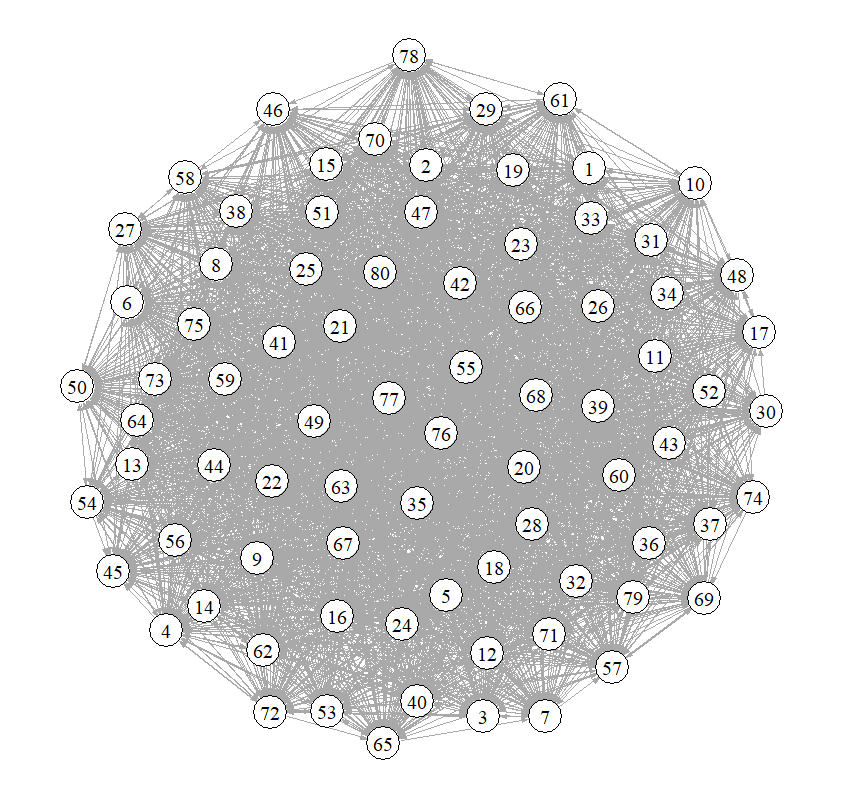

3. Вычислить «пятичисловую сводку» для графа.

In [ ]:
network.size(net) #Размер

gden(net) #Плотность

components(net) #Компоненты

diameter(dir.graph) #Диаметр сети

gtrans(net, mode = "graph") #Коэффициент кластеризации

Результат:

 - 80
 - 0.6178797
 - 1
 - 2
 - 0.6170917

4. Вычислить цензус диад. Сделать выводы.

In [ ]:
print(dyad_census(dir.graph))

Результат:

$mut
[1] 1214

$asym
[1] 1477

$null
[1] 469

Выводы:

 - Число взаимных диад (двунаправленных отношений) равно 1214.

 - Число ассиметричных диад (однонаправленных отношений) равно 1477.

 - Число пар акторов без связей равно 469.

5. Вычислить оценку индекса взаимности Каца — Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы

Пусть d = 45. Каждый актор делает выбор из 79 акторов (g = 80). 

При фиксированом выборе:

In [ ]:
d <- 45
M <- dyad_census(dir.graph)$mut
idx1 <- (2 * (g - 1) * M - g * d^2)/(g * d * (g - 1 - d))
print(idx1)

Результат:
 - 0.2435621

При свободном выборе:

In [ ]:
L <- sum(rowSums(as.matrix(as_adjacency_matrix(dir.graph))))
L2 <- sum(rowSums(as.matrix(as_adjacency_matrix(dir.graph)))^2)
idx2 <- (2*(g - 1)^2 * M - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2)
print(idx2)

Результат:
 - 0.01030456

Выводы:
    При фиксированом выборе образуется больше взаимных связей, в то время как при свободном выборе образуется больше односторонних связей (либо связи не образуются вообще).

6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

При фиксированом выборе:

In [ ]:
print((d / (g - 1)) * ((d/(g - 1)) + idx1 * (g - 1 - d) / (g - 1)))

Результат:

 - 0.3841772

При свободном выборе:

In [ ]:
matr <- as.matrix(as_adjacency_matrix(dir.graph)) 
print(sum((rowSums(matr) * colSums(matr))/(g - 1)^2)/g)

Результат:

 - 0.3818459

7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [ ]:
f.func <- function(t, g, row.sum) {
    C <- factorial(t)/(factorial(2) * factorial(t-2))
    return(sum(row.sum[1:t]) - t*(g-1) - C)
}

g.func <- function(t, g, row.sum) {
    min.sum <- 0   
    for (i in (t + 1):g) {
        min.sum <- min.sum + min(c(t, row.sum[i]))
    }
    return(sum(row.sum[1:t]) - t*(t-1) - min.sum)
}

M <- dyad_census(dir.graph)$mut

f.vals <- rep(2, g)

for (t in 2:g) {
    f.vals[t] <- f.func(t, g, rowSums(matr))
}

g.vals <- rep(2, g - 1)

for (t in 2:(g-1)) {
    g.vals[t] <- g.func(t, g, rowSums(matr))
}

M.min <- max(f.vals)
M.max <- floor(0.5 * sum(rowSums(matr)[1:g]) - max(g.vals))

B.idx <- (M - M.min)/(M.max - M.min)
print(B.idx)

Результат:

 - 0.6221766

Выводы: индекс взаимности Бандиопадхьяйя примерно равен p (0.62)

8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается. 𝛼 = 0.04

In [ ]:
a <- 0.04
L <- sum(matr)
binom.test(L, g * (g - 1), p = 0.5)

Результат:

Exact binomial test

data:  L and g * (g - 1)
number of successes = 3905, number of trials = 6320, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6057689 0.6298817
sample estimates:
probability of success 
             0.6178797 

Выводы: 
    p-value < 𝛼, следовательно, нулевая гипотеза неверна (вероятность построения ребра между любыми двумя акторами не равна 0.5). Максимальный уровень значимости при котором нулевая гипотеза не отвергается = p-value < 2.2e-16

9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается. 𝑃0 = 0.61

In [ ]:
P0 <- 0.61
binom.test(L, g * (g - 1), p = P0)

Результат:


	Exact binomial test

data:  L and g * (g - 1)
number of successes = 3905, number of trials = 6320, p-value = 0.2018
alternative hypothesis: true probability of success is not equal to 0.61
95 percent confidence interval:
 0.6057689 0.6298817
sample estimates:
probability of success 
             0.6178797 

Выводы:
    p-value = 0.2018 > 𝛼 => Нулевая гипотеза выполняется. Максимальный уровень значимости при котором нулевая гипотеза не отвергается = p-value = 0.2018

10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [ ]:
p.est <- (sum(matr))/(g*(g-1)) #Оценка параметра p
lapl <- 0.5 - (a/2)
print(lapl) # 0.48
z_a <- 2.06 # из таблицы Лапласа

p_low <- p.est - z_a * sqrt((p.est * (1 - p.est))/(g * (g - 1)))
p_up <- p.est + z_a * sqrt((p.est * (1 - p.est))/(g * (g - 1)))
print(p_low)
print(p_up)

Результат:
 - 0.6052887
 - 0.6304708

Выводы:
Доверительный интервал: [0.6052887; 0.6304708]. p = 0.62, доверительный интервал вычислен верно (доверительная надёжность = (1 - 𝛼)).

## Выводы

В ходе выполнения данной практической работы мы овладели навыками работы с математическими пакетами для статистического анализа социальных сетей. Мы провели статистический анализ ориентированного графа с помощью языка R, а так же библиотек igraph и statnet.